<div class="usecase-title">Soil Analysis and Prediction</div>

<div class="usecase-authors"><b>Authored by: </b> Thomas Rostov</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



### Importing Libraries and Data

In [1]:
#importing libraries
import requests
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# def collect_data(dataset_id):
#     base_url = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/"
#     apikey = 
#     dataset_id = dataset_id
#     format = 'csv'

#     url = f'{base_url}{dataset_id}/exports/{format}'
#     params = {
#         'select': '*',
#         'limit': -1,  # all records
#         'lang': 'en',
#         'timezone': 'Australia/Melbourne',
#         'api_key': apikey  # use if use datasets API_key permissions
#     }

#     response = requests.get(url, params=params)

#     if response.status_code == 200:
#         # StringIO to read the CSV data
#         url_content = response.content.decode('utf-8')
#         dataset = pd.read_csv(StringIO(url_content), delimiter=';')
#         return dataset
#     else:
#         print(f'Request failed with status code {response.status_code}')
        
# data_soil = collect_data('soil-sensor-readings-historical-data-2022')

In [3]:
#reading in datasets
data_soil = pd.read_csv('soil_readings.csv')
data_weather = pd.read_csv('Melbourne Weather Data 2022.csv')

In [4]:
print(len(data_soil))
data_soil.head()

4283583


,date_time,site_name,site_id,id,date,time,probe_id,probe_measure,soil_value,unit,json_featuretype
0,2022-12-07T18:00:00+11:00,Shrine Reserve South West,64984,15178649,2022-12-07,18:00:00,1306862,Soil Temperature 60cm #0,16.21,ºC,SoilSensorData
1,2022-12-07T22:30:00+11:00,Princess bridge NW p01,101032,15178652,2022-12-07,22:30:00,2019275,Soil Moisture 40cm (Adjusted),13.81,%VWC,SoilSensorData
2,2022-12-08T02:00:00+11:00,Fitzroy Gardens West '18,65011,15178660,2022-12-08,02:00:00,1305913,Soil Salinity 60cm #0,0.34,µS/cm,SoilSensorData
3,2022-12-07T22:00:00+11:00,Bourke North 5,66201,15178677,2022-12-07,22:00:00,1310519,Soil Moisture 40cm #0,78.47,%VWC,SoilSensorData
4,2022-12-08T04:00:00+11:00,Carlton Gardens North,64979,15178683,2022-12-08,04:00:00,1306505,Soil Moisture 60cm #0,50.44,%VWC,SoilSensorData


In [5]:
data_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Melbourne,Australia",2022-01-01,36.5,20.6,26.2,34.9,20.6,25.7,11.8,43.4,...,21.3,9,NaN,2022-01-01T06:01:34,2022-01-01T20:45:17,0.94,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"95874099999,94866099999,95936099999,9586609999..."
1,"Melbourne,Australia",2022-01-02,29.4,18.8,23.0,28.3,18.8,22.9,13.1,55.4,...,22.4,9,NaN,2022-01-02T06:02:22,2022-01-02T20:45:25,0.97,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"95874099999,94866099999,95936099999,9586609999..."
2,"Melbourne,Australia",2022-01-03,19.9,16.8,18.2,19.9,16.8,18.2,10.8,62.3,...,28.1,10,NaN,2022-01-03T06:03:11,2022-01-03T20:45:30,0.00,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"95874099999,94866099999,95936099999,9586609999..."
3,"Melbourne,Australia",2022-01-04,22.4,16.3,19.4,22.4,16.3,19.4,14.5,73.6,...,10.8,5,NaN,2022-01-04T06:04:02,2022-01-04T20:45:34,0.04,Overcast,Cloudy skies throughout the day.,cloudy,"95874099999,94866099999,95936099999,9586609999..."
4,"Melbourne,Australia",2022-01-05,28.5,20.1,23.5,28.6,20.1,23.5,16.4,65.7,...,19.6,10,NaN,2022-01-05T06:04:53,2022-01-05T20:45:35,0.07,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"95874099999,D6954,94866099999,95936099999,9586..."


### Cleaning Data

In [6]:
#removing timezone from soil dataset
data_soil['datetime'] = pd.to_datetime(data_soil['date_time'], errors='coerce') 

def remove_timezone(x):
     return x.replace(tzinfo=None)
    
data_soil['datetime_no_tz'] = data_soil['datetime'].apply(remove_timezone)

In [7]:
#creating a date column for soil dataset
data_soil['date_column'] = data_soil['datetime_no_tz'].dt.date

In [8]:
#list of all unique probe measurements
#from this we can see the soil types are:
#(Sand), (Sandy Loam), (Clay), (Clayey Loam), Clay , Clay-Loam , Loam , (Loam)

#The raw measurement is included for sensors with a determined soil type, and this measurement is then calibrated 
#to the specific soil type

#Otherwise, there are many different inconsistent formats, which will be filtered out later 
measure_unique = data_soil['probe_measure'].unique()
print(measure_unique)

['Soil Temperature 60cm #0' 'Soil Moisture 40cm (Adjusted)'
 'Soil Salinity 60cm #0' 'Soil Moisture 40cm #0' 'Soil Moisture 60cm #0'
 'Soil Moisture 70cm' 'Soil Moisture 10cm #0'
 'Soil Moisture 20cm (Adjusted)' 'Soil Moisture 30cm #0 (Sand)'
 'Soil Temperature 40cm' 'Soil Moisture 30cm #0'
 'Soil Moisture 10cm (Adjusted)' '#0 Soil Moisture 70cm'
 'Soil Temperature 80cm #0' 'Soil Salinity 50cm #0' 'Soil Salinity 10cm'
 'Soil Temperature 70cm #0' 'Soil Moisture 70cm #0 (Clay)'
 'Soil Salinity 50cm' 'Soil Moisture 20cm #0 (Sandy Loam)'
 'Soil Moisture 40cm #0 (Clay)' 'Soil Moisture 80cm #0 (Sand)'
 'Soil Salinity 30cm #0' 'Soil Moisture 20cm #0' 'Soil Moisture 60cm'
 'Soil Moisture Loam 50cm' 'Soil Temperature 50cm #0'
 '#0 Soil Moisture 10cm' '#0 Soil Moisture 20cm' 'Soil Moisture 70cm #0'
 '#0 Soil Moisture 50cm' 'Soil Salinity 10cm #0' 'Soil Moisture 80cm #0'
 'Soil Salinity 70cm #0' 'Soil Temperature 30cm #0'
 '#0 Soil Moisture 40cm' 'Soil Temperature 10cm #0'
 'Soil Salinity 20cm #0

In [9]:
#checking if the soil type is included in the measurement 
def check_soil_type(measure):
    if '(Sand)' in measure:
        return 'Sand'
    elif '(Sandy Loam)' in measure:
        return 'Sandy Loam'
    elif '(Clay)' in measure or 'Clay ' in measure:
        return 'Clay'
    elif '(Clayey Loam)' in measure:
        return 'Clayey Loam'
    elif 'Clay-Loam' in measure: 
        return 'Clay-Loam'
    elif '(Loam)' in measure or 'Loam ' in measure:
        return 'Loam'
    else:
        return 'Not-Stated'

In [10]:
#including the soil type in a seperate column
data_soil['soil_type'] = data_soil['probe_measure'].apply(check_soil_type)

In [11]:
#standardising measurements
cm_list = ['10cm', '20cm', '30cm', '40cm', '50cm', '60cm', '70cm', '80cm']
mes_list = ['Temperature', 'Moisture', 'Salinity']

def check_measurement(measure):
    for cm in cm_list:
        for mes in mes_list:
            if mes in measure and cm in measure:
                return 'Soil ' + mes + ' ' + cm

In [12]:
data_soil['probe_measure_inorder'] = data_soil['probe_measure'].apply(check_measurement)

In [13]:
#checking the changes
data_soil.head()

,date_time,site_name,site_id,id,date,time,probe_id,probe_measure,soil_value,unit,json_featuretype,datetime,datetime_no_tz,date_column,soil_type,probe_measure_inorder
0,2022-12-07T18:00:00+11:00,Shrine Reserve South West,64984,15178649,2022-12-07,18:00:00,1306862,Soil Temperature 60cm #0,16.21,ºC,SoilSensorData,2022-12-07 18:00:00+11:00,2022-12-07 18:00:00,2022-12-07,Not-Stated,Soil Temperature 60cm
1,2022-12-07T22:30:00+11:00,Princess bridge NW p01,101032,15178652,2022-12-07,22:30:00,2019275,Soil Moisture 40cm (Adjusted),13.81,%VWC,SoilSensorData,2022-12-07 22:30:00+11:00,2022-12-07 22:30:00,2022-12-07,Not-Stated,Soil Moisture 40cm
2,2022-12-08T02:00:00+11:00,Fitzroy Gardens West '18,65011,15178660,2022-12-08,02:00:00,1305913,Soil Salinity 60cm #0,0.34,µS/cm,SoilSensorData,2022-12-08 02:00:00+11:00,2022-12-08 02:00:00,2022-12-08,Not-Stated,Soil Salinity 60cm
3,2022-12-07T22:00:00+11:00,Bourke North 5,66201,15178677,2022-12-07,22:00:00,1310519,Soil Moisture 40cm #0,78.47,%VWC,SoilSensorData,2022-12-07 22:00:00+11:00,2022-12-07 22:00:00,2022-12-07,Not-Stated,Soil Moisture 40cm
4,2022-12-08T04:00:00+11:00,Carlton Gardens North,64979,15178683,2022-12-08,04:00:00,1306505,Soil Moisture 60cm #0,50.44,%VWC,SoilSensorData,2022-12-08 04:00:00+11:00,2022-12-08 04:00:00,2022-12-08,Not-Stated,Soil Moisture 60cm


### Seperating and Merging Data

In [14]:
#unique list of site names/sensors
sensor_list = data_soil['site_name'].unique().tolist()

In [15]:
#list of unique measurements, specifically in order
measurement_list = ['Soil Temperature 10cm', 'Soil Temperature 20cm', 'Soil Temperature 30cm', 'Soil Temperature 40cm', 
                   'Soil Temperature 50cm', 'Soil Temperature 60cm', 'Soil Temperature 70cm', 'Soil Temperature 80cm',
                   'Soil Moisture 10cm', 'Soil Moisture 20cm', 'Soil Moisture 30cm', 'Soil Moisture 40cm', 
                   'Soil Moisture 50cm', 'Soil Moisture 60cm', 'Soil Moisture 70cm', 'Soil Moisture 80cm', 
                   'Soil Salinity 10cm', 'Soil Salinity 20cm', 'Soil Salinity 30cm', 'Soil Salinity 40cm', 
                   'Soil Salinity 50cm', 'Soil Salinity 60cm', 'Soil Salinity 70cm', 'Soil Salinity 80cm']

In [16]:
#two different DF's, one for the raw values, one which includes the soil type
data_soil_notype = data_soil.copy()
data_soil_type = data_soil.copy()

In [17]:
#removing the adjusted values
for sensor in sensor_list:
    if len(data_soil_notype[data_soil_notype['site_name'] == sensor]['soil_type'].unique()) > 1:
        mask = (data_soil_notype['site_name'] == sensor) & (data_soil_notype['soil_type'] != 'Not-Stated')
        data_soil_notype.drop(index=data_soil_notype[mask].index, inplace=True)
    else:
        continue

In [18]:
#removing the unadjusted raw values from the sensors which have a determined soil type
for sensor in sensor_list:
    if len(data_soil_type[data_soil_type['site_name'] == sensor]['soil_type'].unique()) > 1:
        mask = (data_soil_type['site_name'] == sensor) & (data_soil_type['soil_type'] == 'Not-Stated')
        data_soil_type.drop(index=data_soil_type[mask].index, inplace=True)
    else:
        continue

In [19]:
#group by average values daily
data_soil_daily_notype = data_soil_notype.groupby(['date_column', 'site_name', 'probe_measure_inorder']).agg({'soil_value': 'mean'}).reset_index()
data_soil_daily_type = data_soil_type.groupby(['date_column', 'site_name', 'probe_measure_inorder', 'soil_type']).agg({'soil_value': 'mean'}).reset_index()

In [20]:
print(len(data_soil_daily_notype))
data_soil_daily_notype.head()

363522


,date_column,site_name,probe_measure_inorder,soil_value
0,2022-01-01,8th Green,Soil Moisture 10cm,50.078571
1,2022-01-01,8th Green,Soil Moisture 20cm,55.730000
2,2022-01-01,8th Green,Soil Moisture 30cm,51.622857
3,2022-01-01,8th Green,Soil Moisture 40cm,67.078571
4,2022-01-01,8th Green,Soil Salinity 10cm,0.487143


In [21]:
#converting weather to correct format
data_weather['datetime'] = pd.to_datetime(data_weather['datetime']) 
data_weather['date_column'] = data_weather['datetime'].dt.date

In [22]:
#merging DF's
data_merged = pd.merge(data_weather, data_soil_daily_notype, on=['date_column'])
data_merged_type = pd.merge(data_weather, data_soil_daily_type, on=['date_column'])

In [23]:
#adding a month column and then keeping necessary columns
data_merged['month'] = data_merged['datetime'].dt.month
data_merged['datetime'] = pd.to_datetime(data_merged['date_column'])
data_merged['month'] = data_merged['datetime'].dt.month

columns_to_keep = ['date_column', 'site_name', 'probe_measure_inorder', 'soil_value', 'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'month']
data_merged = data_merged[columns_to_keep]

#for the type DF
data_merged_type['month'] = data_merged_type['datetime'].dt.month
data_merged_type['datetime'] = pd.to_datetime(data_merged_type['date_column'])
data_merged_type['month'] = data_merged_type['datetime'].dt.month

columns_to_keep = ['date_column', 'site_name', 'probe_measure_inorder', 'soil_value', 'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'month', 'soil_type']
data_merged_type = data_merged_type[columns_to_keep]

In [24]:
print(len(data_merged))
data_merged.head()

363522


,date_column,site_name,probe_measure_inorder,soil_value,tempmax,tempmin,temp,humidity,precip,month
0,2022-01-01,8th Green,Soil Moisture 10cm,50.078571,36.5,20.6,26.2,43.4,0.0,1
1,2022-01-01,8th Green,Soil Moisture 20cm,55.730000,36.5,20.6,26.2,43.4,0.0,1
2,2022-01-01,8th Green,Soil Moisture 30cm,51.622857,36.5,20.6,26.2,43.4,0.0,1
3,2022-01-01,8th Green,Soil Moisture 40cm,67.078571,36.5,20.6,26.2,43.4,0.0,1
4,2022-01-01,8th Green,Soil Salinity 10cm,0.487143,36.5,20.6,26.2,43.4,0.0,1


### Interactive Visualization

In [25]:
#function takes the sensor and measurement index from the above list and creates a graph
def create_graph(sensor_index, measurement_index):
    filtered = data_merged[(data_merged['site_name'] == sensor_list[sensor_index]) & (data_merged['probe_measure_inorder'] == measurement_list[measurement_index])]
    plt.figure(figsize=(10, 6))  
    plt.plot(filtered['date_column'], filtered['soil_value'])
    plt.title('Measurements for: ' + sensor_list[sensor_index])  
    plt.xlabel('Date')  
    plt.ylabel(measurement_list[measurement_index])
    plt.grid(True) 
    plt.show()

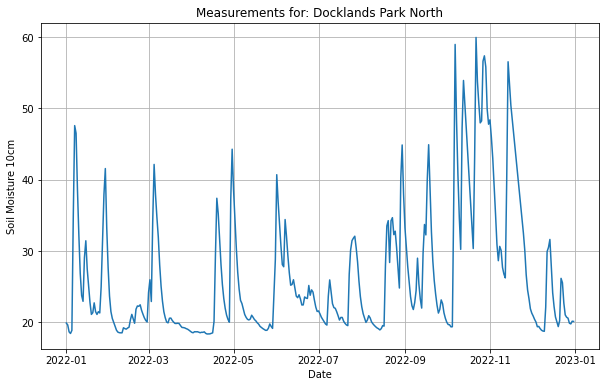

In [26]:
create_graph(6,8)

In [27]:
#widget selection options
dropdown_sensor = widgets.Dropdown(
    options=sensor_list,
    value=sensor_list[0],
    description='Select the sensor/location:',
    layout=widgets.Layout(width='400px'),
    style={'description_width': 'initial'},
    disabled=False,
)

dropdown_measurement = widgets.Dropdown(
    options=measurement_list,
    value=measurement_list[0],
    description='Select the measurement:',
    layout=widgets.Layout(width='400px'),
    style={'description_width': 'initial'},
    disabled=False,
)

Button(description='Create Graph', style=ButtonStyle())

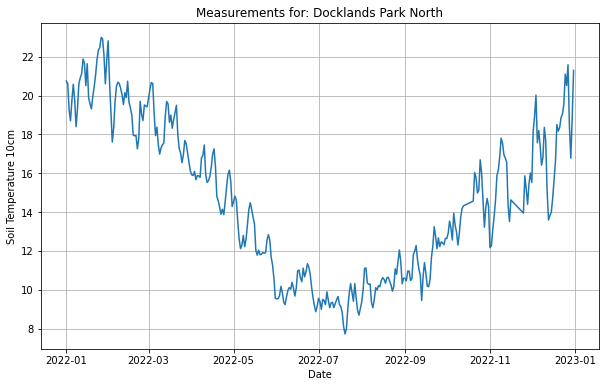

In [28]:
#widget logic
def on_button_click(a):
    sensor_input = sensor_list.index(dropdown_sensor.value)
    measure_input = measurement_list.index(dropdown_measurement.value)
    create_graph(sensor_input, measure_input)

button = widgets.Button(description="Create Graph")
button.on_click(on_button_click)

display(widgets.HBox([dropdown_sensor, dropdown_measurement]))
display(button)